In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold
import tensorflow as tf

In [63]:
df = pd.read_csv("data.csv")
df = df.rename(columns={"tension_strenght": "tensile_strength"})
df

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7
5,0.02,10,40,honeycomb,200,60,40,pla,0,60,24,1.1
6,0.02,5,10,grid,205,65,40,pla,25,55,12,1.3
7,0.02,10,10,honeycomb,210,70,40,pla,50,21,14,1.5
8,0.02,9,70,grid,215,75,40,pla,75,24,27,1.4
9,0.02,8,40,honeycomb,220,80,40,pla,100,30,25,1.7


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tensile_strength    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


In [65]:
for column in df.columns:
    print(str(column)+": "+str(df[column].unique()))
    print()

layer_height: [0.02 0.06 0.1  0.15 0.2 ]

wall_thickness: [ 8  7  1  4  6 10  5  9  2  3]

infill_density: [90 80 70 40 10 20 50 30 60]

infill_pattern: ['grid' 'honeycomb']

nozzle_temperature: [220 225 230 240 250 200 205 210 215]

bed_temperature: [60 65 70 75 80]

print_speed: [ 40  60 120]

material: ['abs' 'pla']

fan_speed: [  0  25  50  75 100]

roughness: [ 25  32  40  68  92  60  55  21  24  30  75 118 200 220 126 145  88  74
 120 144 265 312 368 180 176 128 138 121 168 154 225 289 326 192 212 172
 163 276 298 360 357 321 278 244]

tensile_strength: [18 16  8 10  5 24 12 14 27 25 37  9 23 26 33 29 19 11 34 13 22  4 35 28
 21 30]

elongation: [1.2 1.4 0.8 0.5 0.7 1.1 1.3 1.5 1.7 2.4 1.  2.2 1.9 1.6 2.1 2.  0.9 0.4
 1.8 2.9 0.6 2.8 2.3 3.3 3.1 2.7 3.2]



In [66]:
#In this data set, ABS and PLA assigned 0 and 1 values for materials (abs = 0, pla = 1)
df.material = [0 if each=='abs' else 1 for each in df.material]

#In this data set, grid and honeycomb assigned 0 and 1 values for infill_pattern (grid = 0, honeycomb = 1)
df.infill_pattern = [0 if each=='grid' else 1 for each in df.infill_pattern]

df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7


In [67]:
df.layer_height = df.layer_height*100
df.elongation = df.elongation*100

In [68]:
df.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tensile_strength,elongation
0,2.0,8,90,0,220,60,40,0,0,25,18,120.0
1,2.0,7,90,1,225,65,40,0,25,32,16,140.0
2,2.0,1,80,0,230,70,40,0,50,40,8,80.0
3,2.0,4,70,1,240,75,40,0,75,68,10,50.0
4,2.0,6,90,0,250,80,40,0,100,92,5,70.0


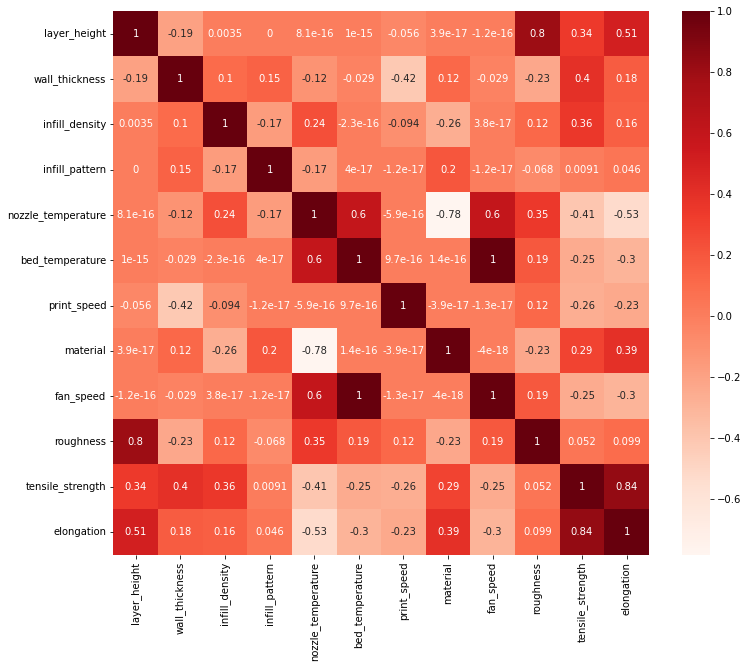

In [69]:
import seaborn as sns
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds) #Using Pearson Correlation
plt.show()

In [70]:
target_cols = ['tensile_strength', 'roughness', 'elongation']
Y = df[target_cols].values
X = df.drop(target_cols,axis=1).values

In [80]:
# Construct a NN model using functional API
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense, Dropout, Activation, Flatten

inputvec = Input( shape=(9,) )
x = Dense( 8, activation='relu' )(inputvec)
x = Dense( 16, activation='relu' )(x)
x = Dense( 32, activation='relu' )(x)
#x = Dropout(0.5)(x)
x = Dense( 16, activation='relu' )(x)
x = Dense( 8, activation='relu' )(x)
x = Dense( 4, activation='relu' )(x)
#x = Dropout(0.25)(x)
preds = Dense(3, activation='linear' )(x)

model_NN = Model(name= 'NN_model 1', inputs = inputvec,outputs=preds)
model_NN.summary()

Model: "NN_model 1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_20 (Dense)            (None, 8)                 80        
                                                                 
 dense_21 (Dense)            (None, 16)                144       
                                                                 
 dense_22 (Dense)            (None, 32)                544       
                                                                 
 dense_23 (Dense)            (None, 16)                528       
                                                                 
 dense_24 (Dense)            (None, 8)                 136       
                                                                 
 dense_25 (Dense)            (None, 4)                 3

In [73]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

Fold 1
Epoch 1/100
9/9 [==============================] - 1s 35ms/step - loss: 23901.1426 - accuracy: 0.4667 - val_loss: 26628.7344 - val_accuracy: 0.4000
Epoch 2/100
9/9 [==============================] - 0s 6ms/step - loss: 23901.1387 - accuracy: 0.3778 - val_loss: 26628.7344 - val_accuracy: 0.6000
Epoch 3/100
9/9 [==============================] - 0s 6ms/step - loss: 23901.1387 - accuracy: 0.3333 - val_loss: 26628.7344 - val_accuracy: 0.6000
Epoch 4/100
9/9 [==============================] - 0s 7ms/step - loss: 23901.1426 - accuracy: 0.4000 - val_loss: 26628.7344 - val_accuracy: 0.6000
Epoch 5/100
9/9 [==============================] - 0s 7ms/step - loss: 23901.1387 - accuracy: 0.2444 - val_loss: 26628.7344 - val_accuracy: 0.6000
Epoch 6/100
9/9 [==============================] - 0s 6ms/step - loss: 23901.1426 - accuracy: 0.3111 - val_loss: 26628.7344 - val_accuracy: 0.6000
Epoch 7/100
9/9 [==============================] - 0s 6ms/step - loss: 23901.1426 - accuracy: 0.3111 - val_los

Epoch 8/100
9/9 [==============================] - 0s 6ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 9/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 10/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0222 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 11/100
9/9 [==============================] - 0s 6ms/step - loss: 24598.1602 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 12/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 13/100
9/9 [==============================] - 0s 6ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 14/100
9/9 [==============================] - 0s 5ms/step - loss

Epoch 61/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 62/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 63/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 64/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 65/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1602 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 66/100
9/9 [==============================] - 0s 5ms/step - loss: 24598.1641 - accuracy: 0.0000e+00 - val_loss: 20355.5352 - val_accuracy: 0.0000e+00
Epoch 67/100
9/9 [==============================] - 0s 5ms/step 

Epoch 66/100
9/9 [==============================] - 0s 5ms/step - loss: 24604.2617 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 67/100
9/9 [==============================] - 0s 5ms/step - loss: 24604.2578 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 68/100
9/9 [==============================] - 0s 8ms/step - loss: 24604.2617 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 69/100
9/9 [==============================] - 0s 5ms/step - loss: 24604.2617 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 70/100
9/9 [==============================] - 0s 5ms/step - loss: 24604.2578 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 24604.2617 - accuracy: 0.0000e+00 - val_loss: 20300.6660 - val_accuracy: 0.0000e+00
Epoch 72/100
9/9 [==============================] - 0s 6ms/step 

Epoch 71/100
9/9 [==============================] - 0s 6ms/step - loss: 25048.0898 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 72/100
9/9 [==============================] - 0s 5ms/step - loss: 25048.0898 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 73/100
9/9 [==============================] - 0s 5ms/step - loss: 25048.0918 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 74/100
9/9 [==============================] - 0s 5ms/step - loss: 25048.0898 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 75/100
9/9 [==============================] - 0s 5ms/step - loss: 25048.0898 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 76/100
9/9 [==============================] - 0s 5ms/step - loss: 25048.0918 - accuracy: 0.0000e+00 - val_loss: 16306.2002 - val_accuracy: 0.0000e+00
Epoch 77/100
9/9 [==============================] - 0s 5ms/step 

Epoch 76/100
9/9 [==============================] - 0s 6ms/step - loss: 24298.7109 - accuracy: 0.0000e+00 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 77/100
9/9 [==============================] - 0s 5ms/step - loss: 24298.7109 - accuracy: 0.0222 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 78/100
9/9 [==============================] - 0s 5ms/step - loss: 24298.7109 - accuracy: 0.0000e+00 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 79/100
9/9 [==============================] - 0s 5ms/step - loss: 24298.7109 - accuracy: 0.0000e+00 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 80/100
9/9 [==============================] - 0s 5ms/step - loss: 24298.7109 - accuracy: 0.0000e+00 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 81/100
9/9 [==============================] - 0s 5ms/step - loss: 24298.7109 - accuracy: 0.0000e+00 - val_loss: 23050.5996 - val_accuracy: 0.0000e+00
Epoch 82/100
9/9 [==============================] - 0s 6ms/step - lo

9/9 [==============================] - 0s 6ms/step - loss: 25500.4297 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 81/100
9/9 [==============================] - 0s 6ms/step - loss: 25500.4297 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 82/100
9/9 [==============================] - 0s 5ms/step - loss: 25500.4297 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 83/100
9/9 [==============================] - 0s 6ms/step - loss: 25500.4277 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 84/100
9/9 [==============================] - 0s 6ms/step - loss: 25500.4297 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 85/100
9/9 [==============================] - 0s 6ms/step - loss: 25500.4336 - accuracy: 0.0000e+00 - val_loss: 12235.1338 - val_accuracy: 0.0000e+00
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 25500

9/9 [==============================] - 0s 5ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 85/100
9/9 [==============================] - 0s 5ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 86/100
9/9 [==============================] - 0s 5ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 87/100
9/9 [==============================] - 0s 5ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 88/100
9/9 [==============================] - 0s 5ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 89/100
9/9 [==============================] - 0s 6ms/step - loss: 24006.6230 - accuracy: 0.0000e+00 - val_loss: 25679.4004 - val_accuracy: 0.0000e+00
Epoch 90/100
9/9 [==============================] - 0s 5ms/step - loss: 24006

Epoch 37/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7109 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 38/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7109 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 39/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7109 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 40/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7109 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 41/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7148 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 42/100
9/9 [==============================] - 0s 5ms/step - loss: 23640.7109 - accuracy: 0.0000e+00 - val_loss: 28972.5996 - val_accuracy: 0.0000e+00
Epoch 43/100
9/9 [==============================] - 0s 6ms/step 

9/9 [==============================] - 0s 6ms/step - loss: 22590.7402 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 42/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7402 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 43/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 44/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 45/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 46/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 47/100
9/9 [==============================] - 0s 6ms/step - loss: 22590

Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7402 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 94/100
9/9 [==============================] - 0s 6ms/step - loss: 22590.7383 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 95/100
9/9 [==============================] - 0s 5ms/step - loss: 22590.7402 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 96/100
9/9 [==============================] - 0s 6ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 97/100
9/9 [==============================] - 0s 6ms/step - loss: 22590.7402 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 98/100
9/9 [==============================] - 0s 6ms/step - loss: 22590.7422 - accuracy: 0.0000e+00 - val_loss: 38422.3359 - val_accuracy: 0.0000e+00
Epoch 99/100
9/9 [==============================] - 0s 5ms/step 

9/9 [==============================] - 0s 6ms/step - loss: 23550.1328 - accuracy: 0.0000e+00 - val_loss: 29787.8008 - val_accuracy: 0.0000e+00
Epoch 98/100
9/9 [==============================] - 0s 5ms/step - loss: 23550.1328 - accuracy: 0.0000e+00 - val_loss: 29787.8008 - val_accuracy: 0.0000e+00
Epoch 99/100
9/9 [==============================] - 0s 5ms/step - loss: 23550.1328 - accuracy: 0.0000e+00 - val_loss: 29787.8008 - val_accuracy: 0.0000e+00
Epoch 100/100
9/9 [==============================] - 0s 5ms/step - loss: 23550.1309 - accuracy: 0.0000e+00 - val_loss: 29787.8008 - val_accuracy: 0.0000e+00



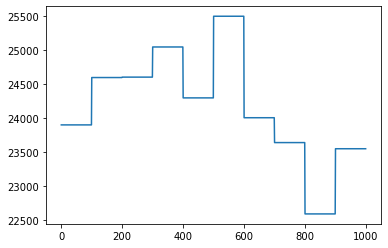

In [74]:
from keras.callbacks import History
history = History()

for n, (tr, te) in enumerate(KFold(n_splits=10, shuffle=True).split(X)):
    print(f'Fold {n+1}')

    model.fit(X[tr],Y.astype(float)[tr],
                validation_data=(X[te], Y.astype(float)[te]),
                epochs=100, batch_size=5, verbose=1, callbacks=[history])
    print('')
    
# Plot the loss history
plt.plot(history.history['loss'])

Text(0, 0.5, 'mean squared error')

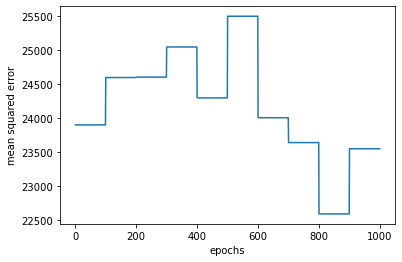

In [81]:
plt.plot(history.history['loss'],)
plt.xlabel("epochs")
plt.ylabel("mean squared error")

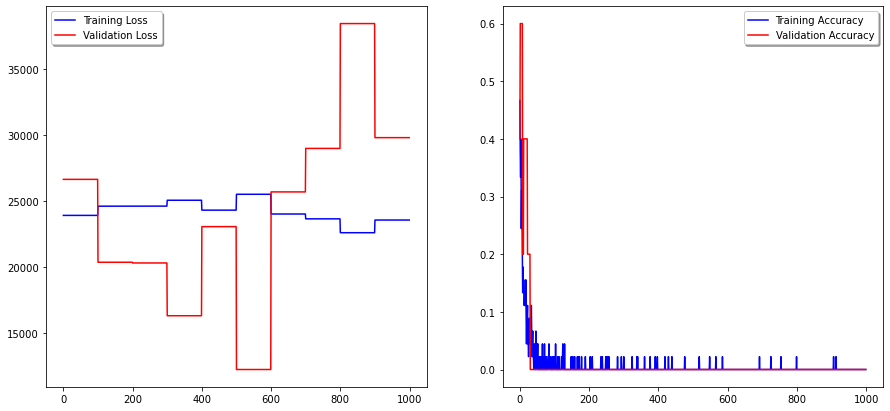

In [75]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

1/1 [==============================] - 0s 26ms/step - loss: 29787.8008 - accuracy: 0.0000e+00
[29787.80078125, 0.0]


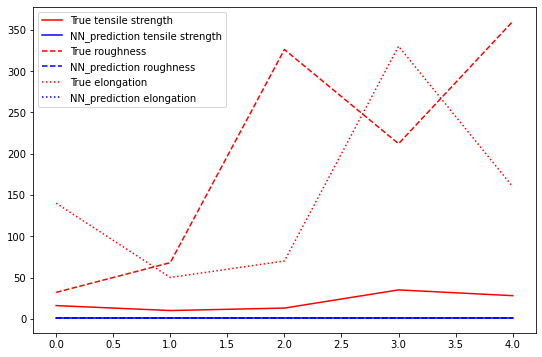

In [82]:
# Evaluate the accuracy of the model (loss: mean squared error, as defined in the step of compiling)
score = model.evaluate(X[te], Y[te], verbose=1)
print(score)

# Batch prediction & plot
Y_pred = model.predict(X[te])

plt.show()
plt.figure(figsize=(9, 6))
line1, = plt.plot(Y[te][:,0],'r-')
line2, = plt.plot(Y_pred[:,0],'b-')
line3, = plt.plot(Y[te][:,1],'r--')
line4, = plt.plot(Y_pred[:,1],'b--')
line5, = plt.plot(Y[te][:,2],'r:')
line6, = plt.plot(Y_pred[:,2],'b:')
plt.legend([line1, line2, line3, line4, line5, line6], ['True tensile strength', 'NN_prediction tensile strength', 'True roughness', 'NN_prediction roughness', 'True elongation', 'NN_prediction elongation'])

In [58]:
Y[te]

array([[ 10.,  68.,  50.],
       [  5.,  92.,  70.],
       [ 10., 220., 100.],
       [ 26.,  88., 160.],
       [ 29.,  74., 200.],
       [ 12., 144., 110.],
       [ 14., 121., 150.],
       [ 22., 172., 230.],
       [  4., 163.,  70.],
       [ 27., 220., 310.]])